# **Chrun**

In [1]:
# Importação
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

## Base de Dados

In [2]:
# Dados
df = pd.read_csv('./data/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Análise Exploratória de Dados - (AED)

In [3]:
# Tamanho
df.shape

(10000, 14)

In [4]:
# Informações 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Descrição
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Figure size 1500x1000 with 0 Axes>

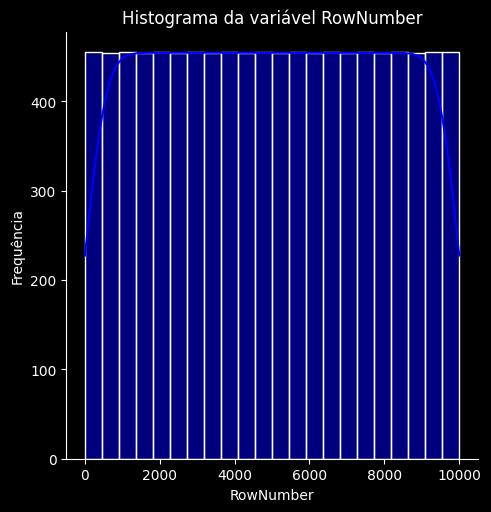

<Figure size 1500x1000 with 0 Axes>

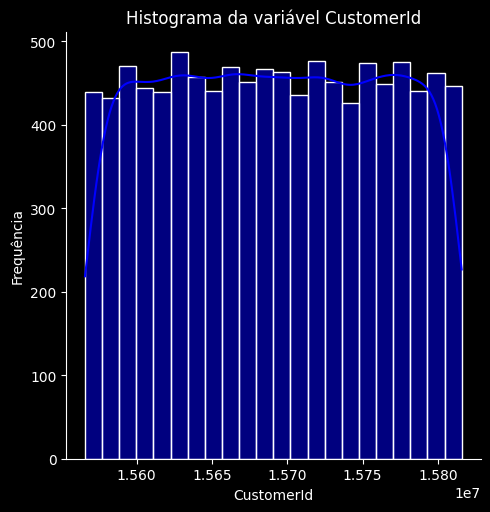

<Figure size 1500x1000 with 0 Axes>

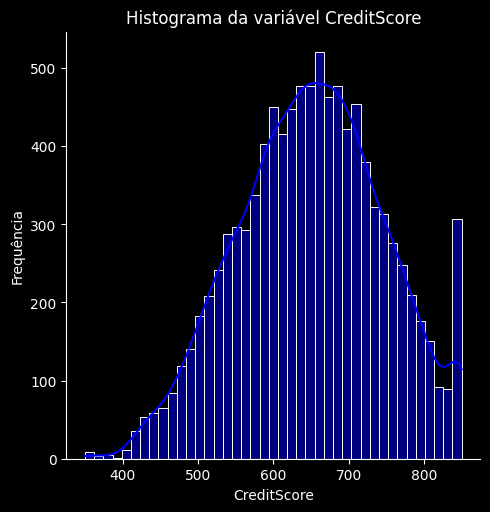

<Figure size 1500x1000 with 0 Axes>

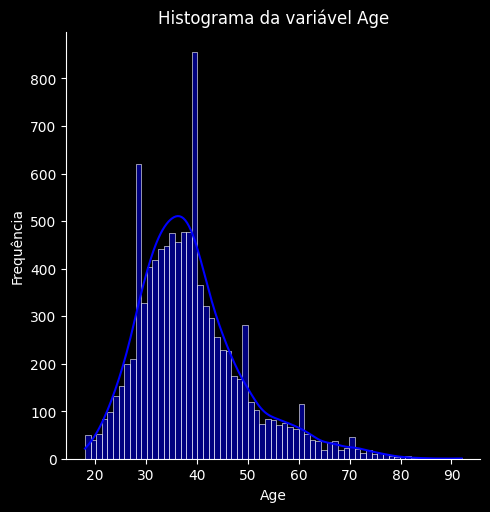

<Figure size 1500x1000 with 0 Axes>

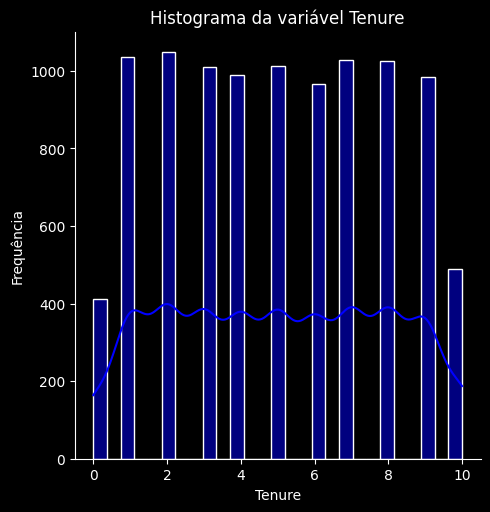

<Figure size 1500x1000 with 0 Axes>

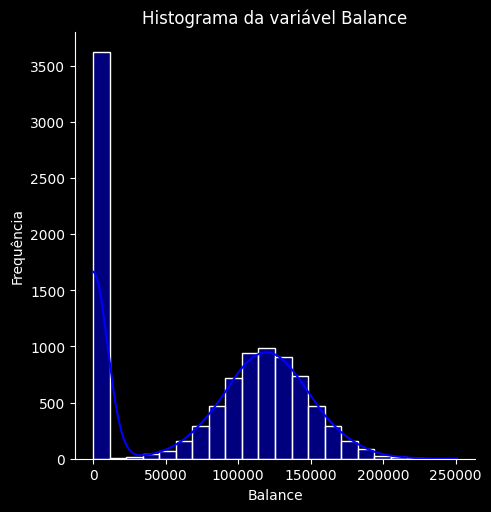

<Figure size 1500x1000 with 0 Axes>

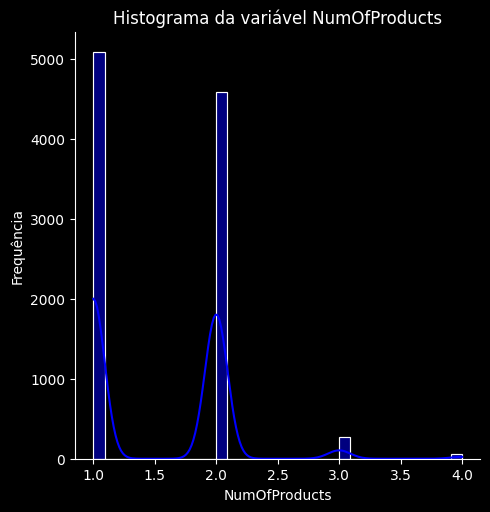

<Figure size 1500x1000 with 0 Axes>

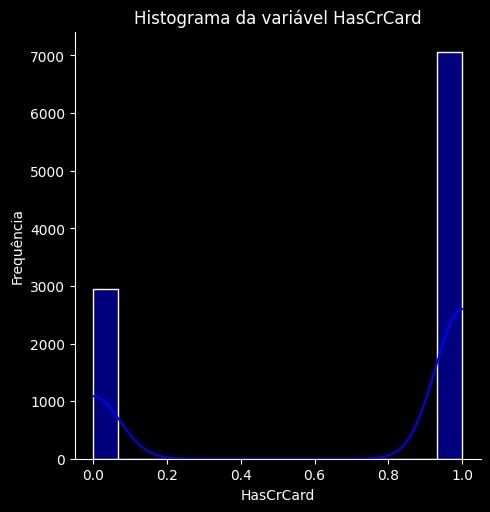

<Figure size 1500x1000 with 0 Axes>

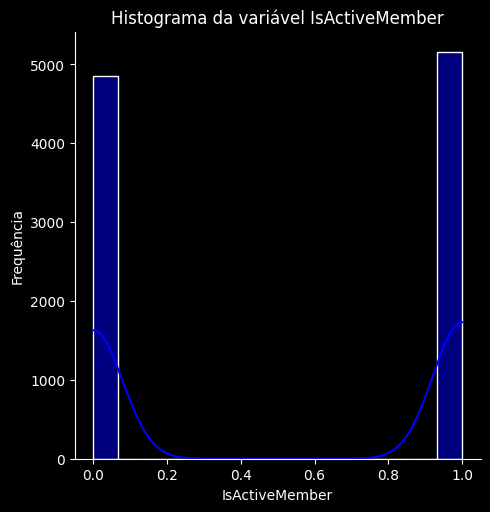

<Figure size 1500x1000 with 0 Axes>

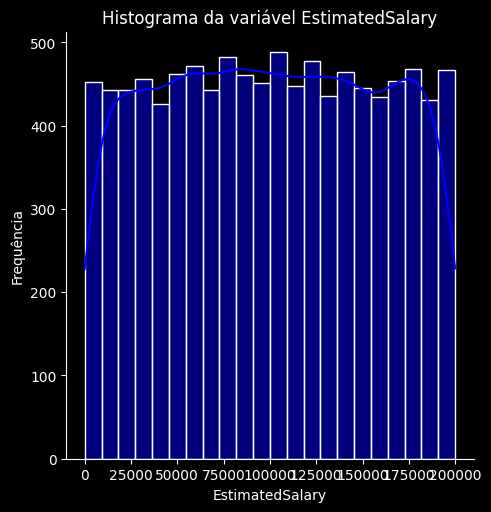

<Figure size 1500x1000 with 0 Axes>

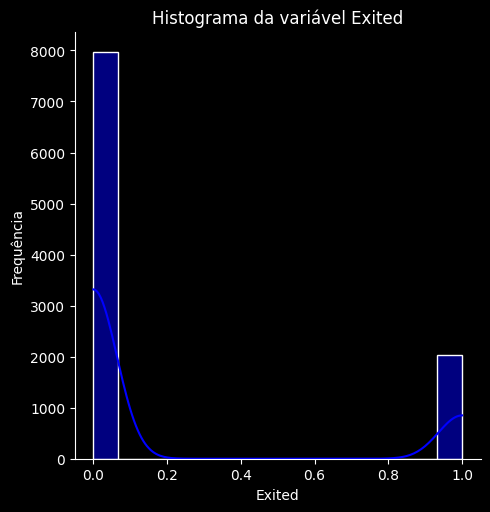

In [6]:
# Selecionando apenas as colunas numéricas
numeric_cols = df.select_dtypes(include=['int', 'float'])

# Plotando histograma para cada coluna numérica
for column in numeric_cols.columns:
    plt.figure(figsize=(15, 10));
    sns.displot(df[column], kde=True, color='blue');
    plt.title(f'Histograma da variável {column}');
    plt.xlabel(column);
    plt.ylabel('Frequência');
    plt.show();

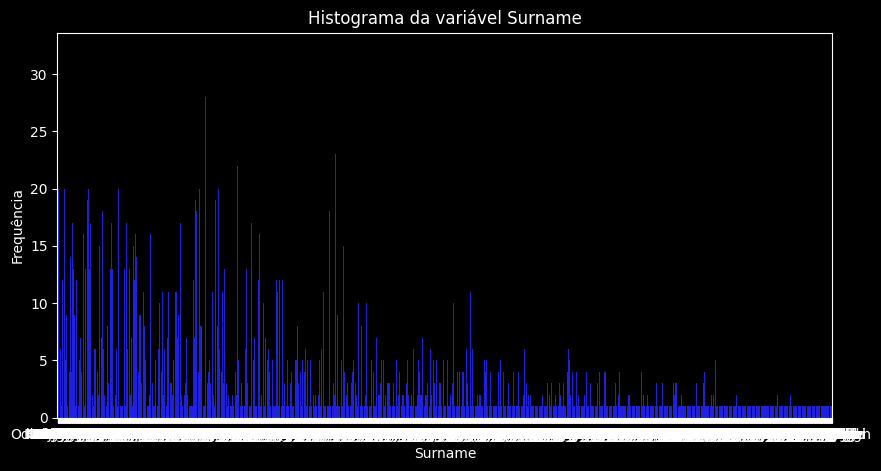

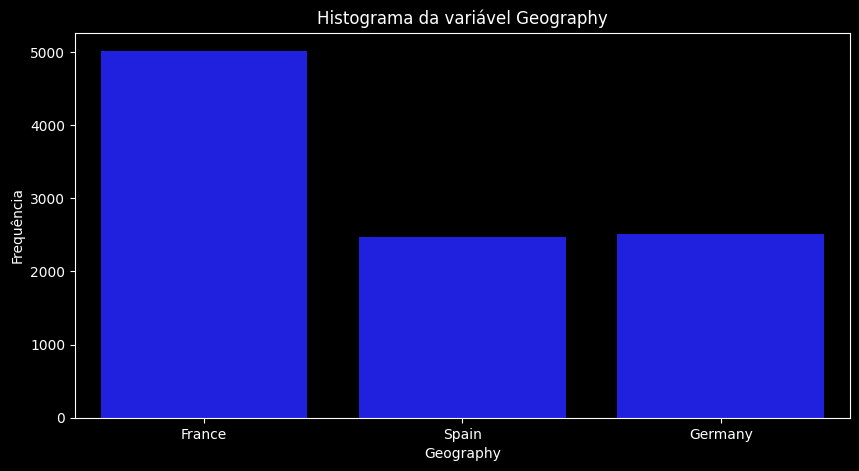

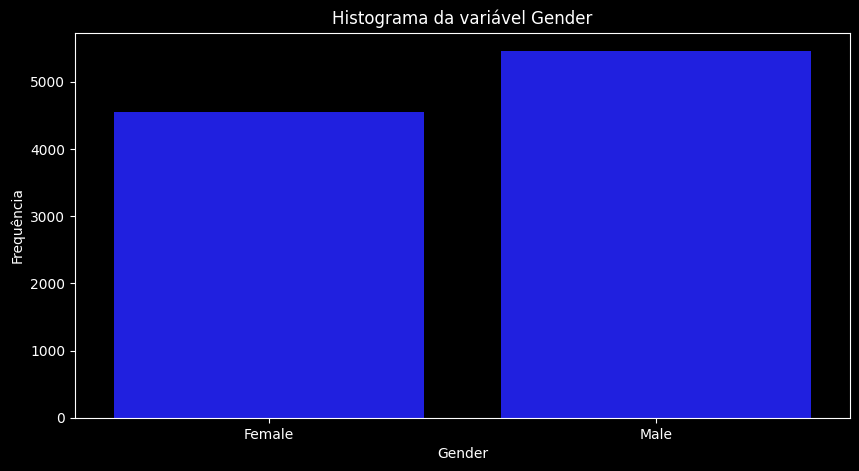

In [7]:
# Selecionando apenas as colunas numéricas
numeric_cols = df.select_dtypes(include=['object'])

# Plotando histograma para cada coluna numérica
for column in numeric_cols.columns:
    plt.figure(figsize=(10, 5));
    sns.countplot(df, x=df[column], color='blue');
    plt.title(f'Histograma da variável {column}');
    plt.xlabel(column);
    plt.ylabel('Frequência');
    plt.show();

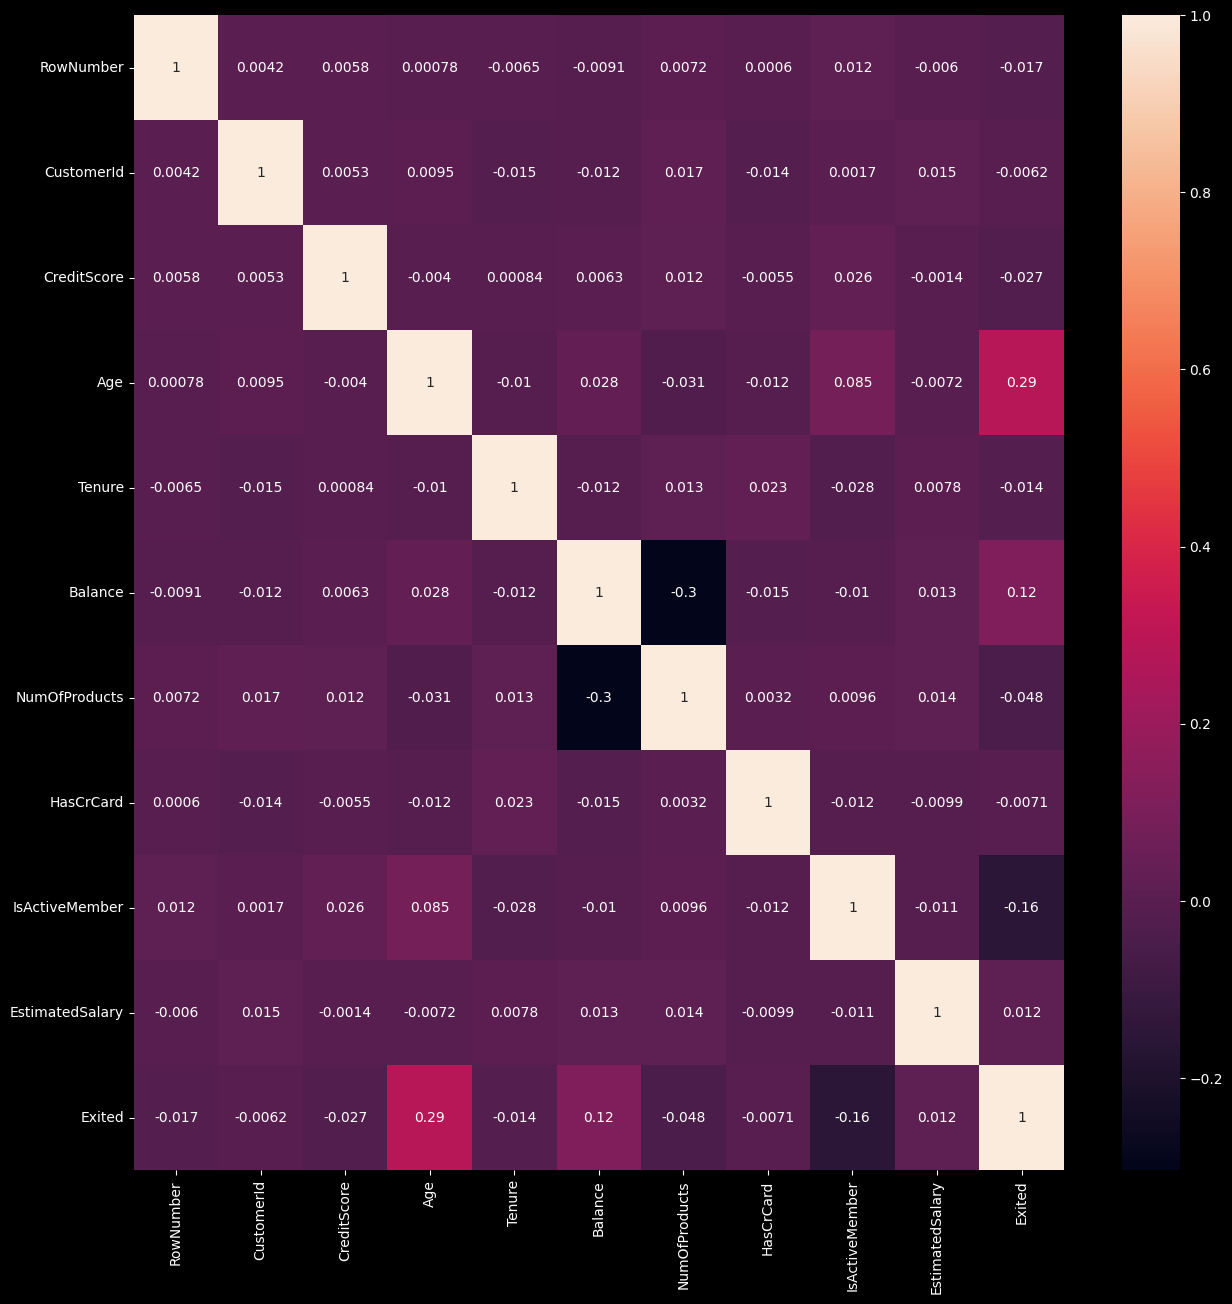

In [8]:
# gráfico de correlação
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(
    df.drop(columns=['Surname', 'Geography', 'Gender']).corr(), annot=True
);

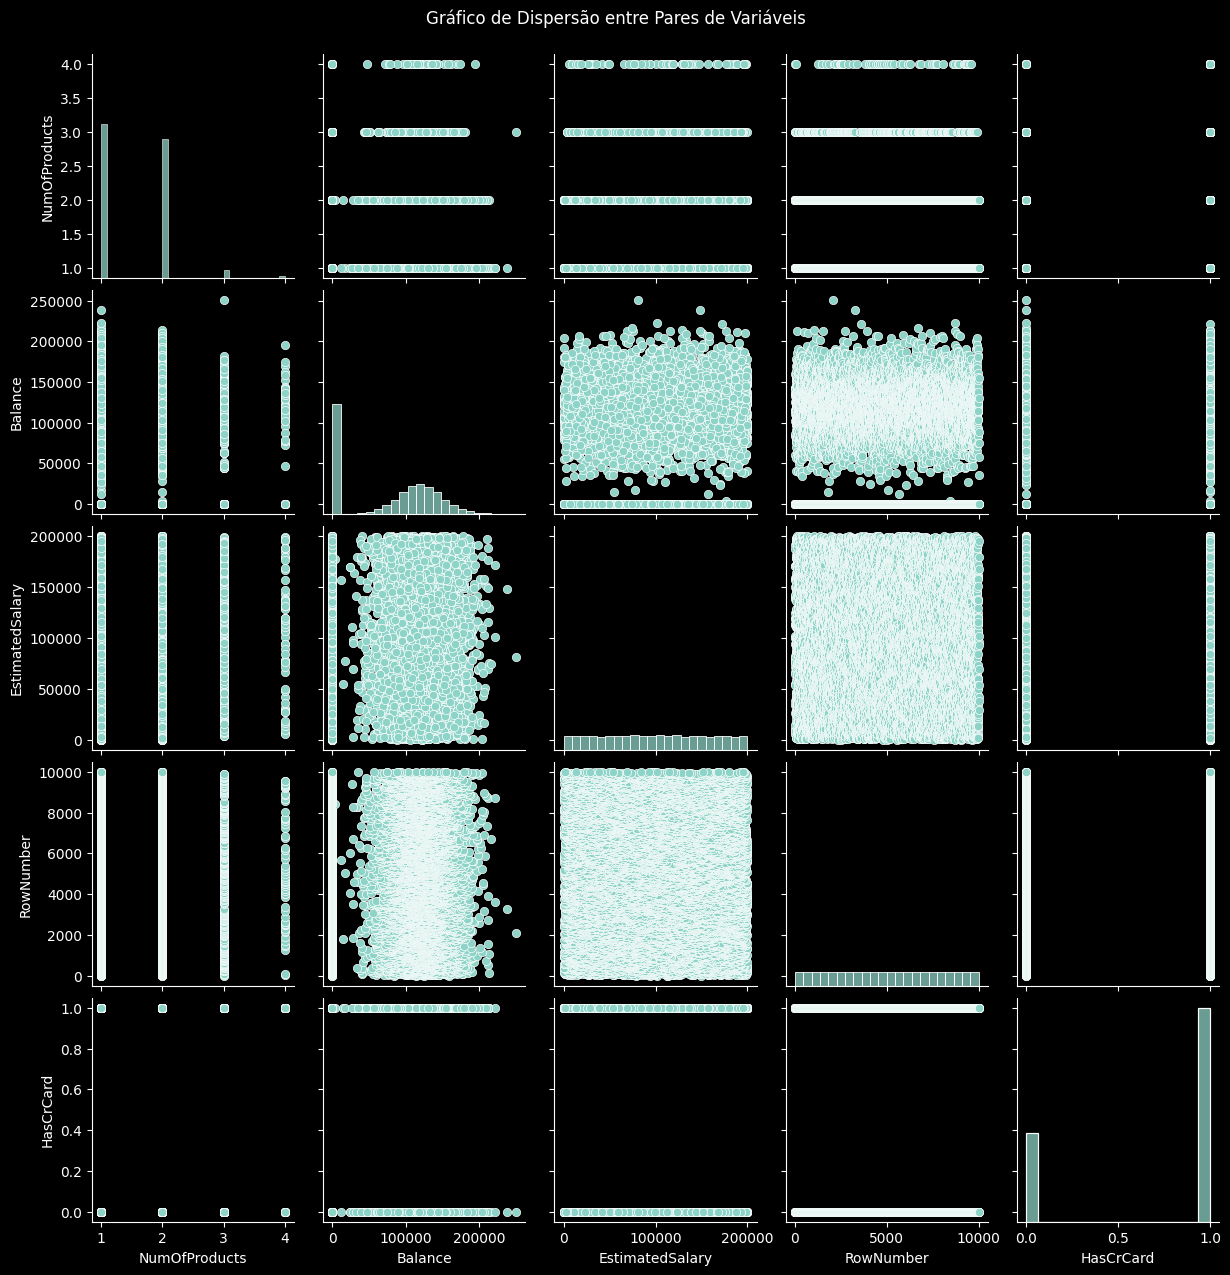

In [9]:
# Selecionar apenas algumas colunas numéricas para a demonstração
numeric_cols = df.select_dtypes(include=['int', 'float']).sample(n=5, axis=1)  # Selecionar aleatoriamente 5 colunas numéricas

# Gráfico de dispersão entre pares de variáveis
sns.pairplot(numeric_cols)
plt.suptitle('Gráfico de Dispersão entre Pares de Variáveis', y=1.02)
plt.show()

In [10]:
# valores únicos
df['Surname'].nunique()

2932

In [11]:
# Contando os valores
df['Surname'].value_counts()

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [12]:
# Valores duplicados
df.duplicated().sum()

0

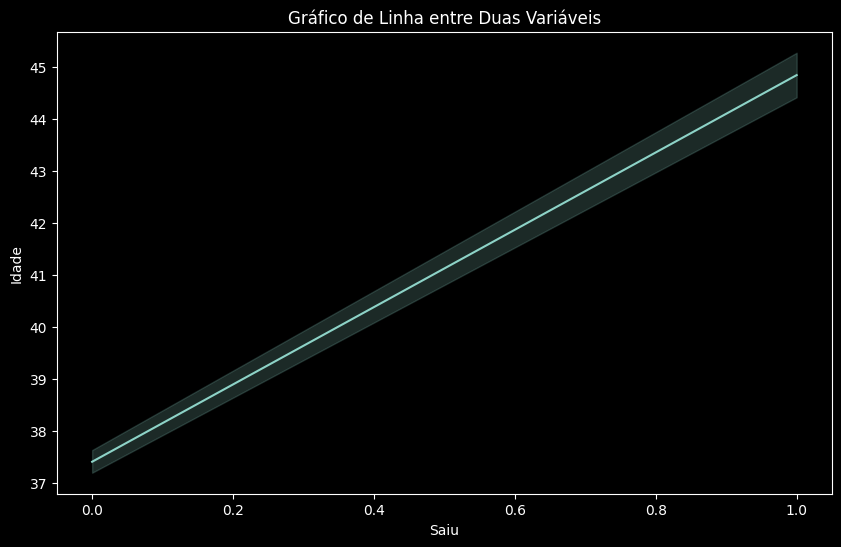

In [13]:
# Gráfico de linha entre duas variáveis
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df['Exited'], y=df['Age'])
plt.title('Gráfico de Linha entre Duas Variáveis')
plt.xlabel('Saiu')
plt.ylabel('Idade')
plt.show();

## Tratamento de Dados

In [14]:
# Removendo colunas desnecessárias
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [15]:
# Revendo as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [16]:
# Verificando os duplicados
df.duplicated().sum()

0

In [17]:
# Criando uma função para transforma valores categóricos em colunas com valores numéricos
def oneHotEncoder(df, colunas):
    # Crie uma instância do OneHotEncoder
    onehotencoder = OneHotEncoder(categories='auto', sparse_output=False, dtype='int32')

    # Aplique a codificação one-hot na coluna 'ocean_proximity'
    ohe = onehotencoder.fit_transform(df[colunas])

    # Obtenha os nomes das categorias
    categories = onehotencoder.categories_

    # Crie os nomes das colunas
    column_names = []
    for i, category in enumerate(categories):
        column_names.extend([f"{colunas[i]}_{cat}" for cat in category])

    # Crie o DataFrame resultante com as colunas codificadas
    ohe_df = pd.DataFrame(ohe, columns=column_names, index=df.index)

    # Concatenando os dois data frame em um só
    ds = pd.concat([df, ohe_df], axis=1)
    ds = ds.drop(columns=colunas)
    return ds

In [18]:
# One Hot Encoding
col = ['Geography', 'Gender']
df = oneHotEncoder(df, col)

In [19]:
# Visualizando o novo df
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [20]:
# Novas Informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  int32  
 10  Geography_Germany  10000 non-null  int32  
 11  Geography_Spain    10000 non-null  int32  
 12  Gender_Female      10000 non-null  int32  
 13  Gender_Male        10000 non-null  int32  
dtypes: float64(2), int32(5), int64(7)
memory usage: 898.6 KB
